In [14]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading as pandas dataframe

In [5]:
deepmass_prism_df = pd.read_csv("./data/uniprot-filtered-reviewed-human-peptides-ftms-hcd-charge2.tsv", delimiter='\t')
hela_cell_1_df = pd.read_csv("./data/HeLaCell_1.tsv", delimiter='\t')
hela_cell_2_df = pd.read_csv("./data/HeLaCell_2.csv")

#### Columns and lengths or rows

In [10]:
print("columns of deepmass_prism", list(deepmass_prism_df.columns))
print("columns of hela_cell_1", list(hela_cell_1_df.columns))
print("columns of hela_cell_2", list(hela_cell_2_df.columns))

print("length of deepmass_prism", len(deepmass_prism_df))
print("length of hela_cell_1", len(hela_cell_1_df))
print("length of hela_cell_2", len(hela_cell_2_df))

columns of deepmass_prism ['key', 'ModifiedSequence', 'ProteinName', 'Charge', 'Fragmentation', 'MassAnalyzer', 'Length', 'FragmentIntensities', 'FragmentIons', 'FragmentMZs', 'PrecursorMZ']
columns of hela_cell_1 ['Peptide_sequence', 'Peptide_length', 'mz', 'Charge', 'Assigned_modification', 'Protein_accession', 'Gene_symbol', 'Protein_name', 'Rsquar', 'Cal_mz', 'Exp Intensity', 'Pred Intensity']
columns of hela_cell_2 ['Peptide_sequence', 'Peptide_length', 'Cal_mz', 'Exp intensity']
length of deepmass_prism 565460
length of hela_cell_1 16762
length of hela_cell_2 27864


#### Distribution of peptide length

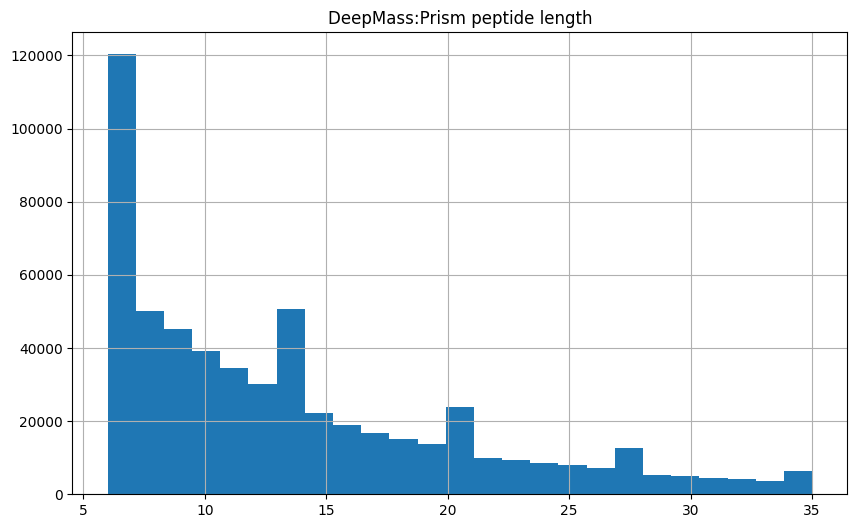

In [27]:
deepmass_prism_df["Length"].hist(figsize=(10, 6), bins=25)
plt.title("DeepMass:Prism peptide length")
plt.show()

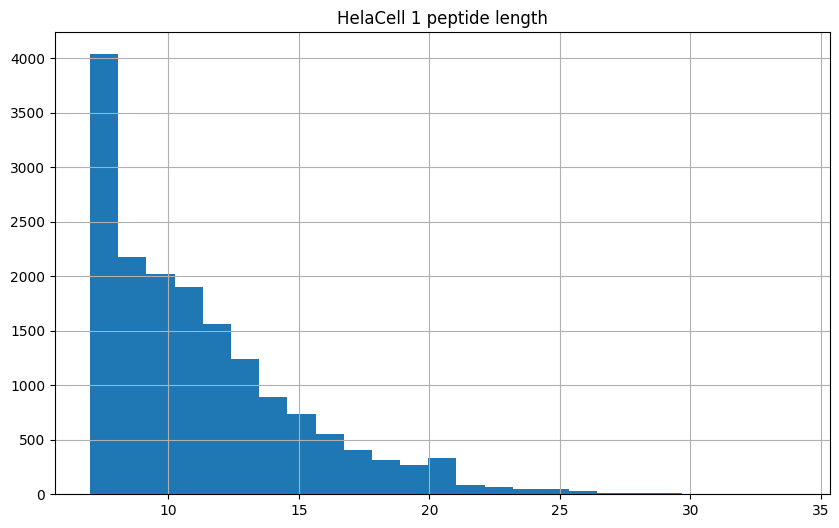

In [28]:
hela_cell_1_df["Peptide_length"].hist(figsize=(10, 6), bins=25)
plt.title("HelaCell 1 peptide length")
plt.show()

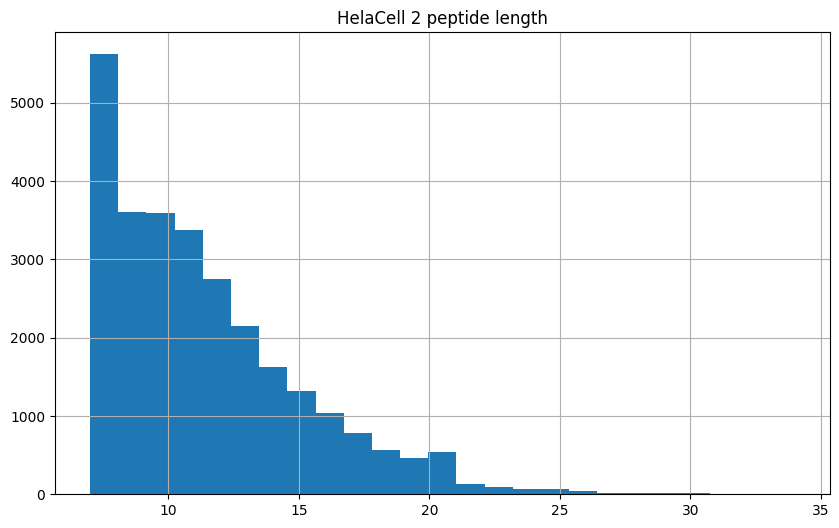

In [29]:
hela_cell_2_df["Peptide_length"].hist(figsize=(10, 6), bins=25)
plt.title("HelaCell 2 peptide length")
plt.show()

### Fragment intensity density

In [46]:
all_fragments = {"deepmass": list(), "hela1": list(), "hela2": list()}
for freg_intensity in deepmass_prism_df["FragmentIntensities"]:
    parsed_intensities = freg_intensity.split(";")
    all_fragments["deepmass"] += [float(item) for item in parsed_intensities]

for freg_intensity in hela_cell_1_df["Exp Intensity"]:
    parsed_intensities = freg_intensity.replace("[", "").replace("]", "").split(",")
    all_fragments["hela1"] += [float(item.strip()) for item in parsed_intensities]

for freg_intensity in hela_cell_2_df["Exp intensity"]:
    parsed_intensities = freg_intensity.replace("[", "").replace("]", "").split(",")
    all_fragments["hela2"] += [float(item.strip()) for item in parsed_intensities]


(array([4.312972e+06, 1.383811e+06, 9.879690e+05, 7.551580e+05,
        6.056800e+05, 5.062230e+05, 4.350590e+05, 3.842340e+05,
        3.427930e+05, 3.083520e+05, 2.780740e+05, 2.532860e+05,
        2.324380e+05, 2.145400e+05, 1.987720e+05, 1.838160e+05,
        1.720890e+05, 1.612350e+05, 1.509670e+05, 1.421360e+05,
        1.337140e+05, 1.255520e+05, 1.196920e+05, 1.123190e+05,
        1.067280e+05, 1.018650e+05, 9.614200e+04, 9.168600e+04,
        8.734100e+04, 8.400200e+04, 8.013300e+04, 7.691600e+04,
        7.367300e+04, 7.016500e+04, 6.736900e+04, 6.417700e+04,
        6.145100e+04, 5.905700e+04, 5.658700e+04, 5.446300e+04,
        5.233800e+04, 4.986800e+04, 4.816800e+04, 4.606100e+04,
        4.425200e+04, 4.241300e+04, 4.091800e+04, 3.970500e+04,
        3.812000e+04, 3.678800e+04, 3.543500e+04, 3.416500e+04,
        3.294700e+04, 3.164900e+04, 3.099700e+04, 2.988500e+04,
        2.925900e+04, 2.826000e+04, 2.765700e+04, 2.678400e+04,
        2.635900e+04, 2.585400e+04, 2.57

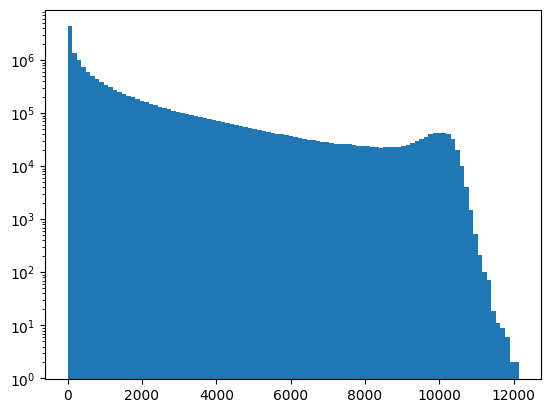

In [58]:
plt.hist(all_fragments["deepmass"], bins=100, log=True)

(array([188701.,   2358.,   4158.,   5048.,   5521.,   5982.,   5952.,
          5735.,   5578.,   5368.,   5115.,   4863.,   4782.,   4537.,
          4275.,   3876.,   3876.,   3744.,   3442.,   3323.,   3303.,
          3171.,   2969.,   2812.,   2676.,   2748.,   2543.,   2470.,
          2242.,   2293.,   2177.,   2069.,   1990.,   1941.,   1863.,
          1879.,   1766.,   1707.,   1697.,   1573.,   1465.,   1459.,
          1442.,   1378.,   1420.,   1271.,   1266.,   1166.,   1131.,
          1101.,   1082.,   1070.,   1024.,   1014.,    949.,    965.,
           905.,    886.,    837.,    848.,    799.,    760.,    756.,
           762.,    650.,    716.,    654.,    623.,    634.,    612.,
           633.,    631.,    553.,    528.,    533.,    522.,    509.,
           524.,    495.,    480.,    480.,    450.,    413.,    421.,
           407.,    392.,    384.,    393.,    388.,    340.,    393.,
           340.,    332.,    313.,    311.,    303.,    315.,    306.,
      

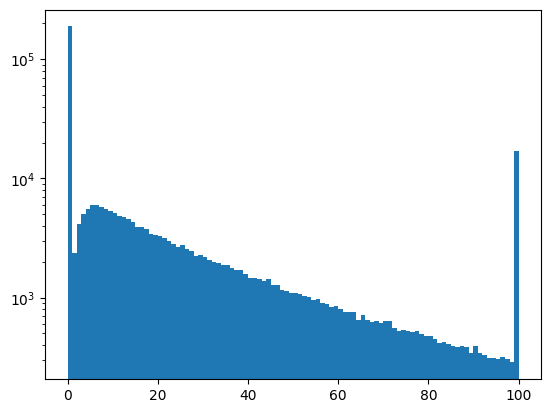

In [57]:
plt.hist(all_fragments["hela1"], bins=100, log=True)

(array([6.35774e+05, 5.70600e+03, 1.43000e+03, 5.52000e+02, 3.08000e+02,
        1.75000e+02, 1.10000e+02, 6.70000e+01, 4.80000e+01, 3.40000e+01,
        2.60000e+01, 3.20000e+01, 1.80000e+01, 1.20000e+01, 1.60000e+01,
        1.70000e+01, 1.10000e+01, 1.10000e+01, 9.00000e+00, 5.00000e+00,
        3.00000e+00, 6.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        7.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

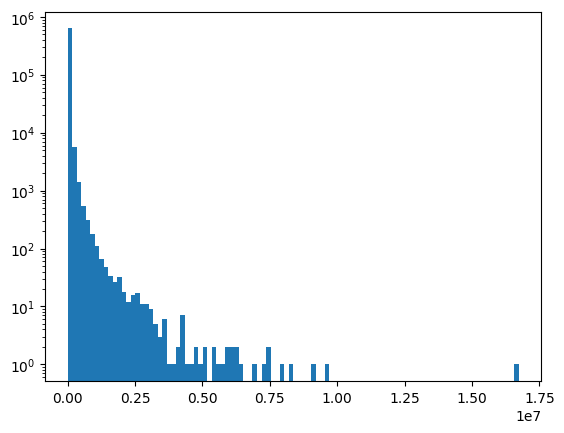

In [63]:
plt.hist(all_fragments["hela2"], bins=100, log=True)

In [62]:
for k, v in all_fragments.items():
    print(k, len(v))

deepmass 15266842
hela1 381222
hela2 644408


In [64]:
deepmass_prism_df

,key,ModifiedSequence,ProteinName,Charge,Fragmentation,MassAnalyzer,Length,FragmentIntensities,FragmentIons,FragmentMZs,PrecursorMZ
0,476136,TIFPSQNGHDGSTDVQQR,E9PIF3;F8WFD2;E9PKD4;P0DM63;E9PJI5;Q9UND3,2,HCD,FTMS,18,638.860007871;410.318709077;614.855429746;3664...,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,175.118951;303.177531;431.236111;530.304521;64...,993.966834
1,476137,TIFPTSTISFEHFGTSCK,Q99590,2,HCD,FTMS,18,270.243426432;713.961882676;728.011967574;328....,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,147.112801;307.143451;394.175481;495.223161;55...,1030.493303
2,476138,TIFQCEPSENNLGSENSAFQQSQGPAVQR,Q8NAM6,2,HCD,FTMS,29,0.0;2112.31324475;1948.02412941;380.232753409;...,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,175.118951;303.177531;402.245941;473.283051;57...,1612.239073
3,476139,TIFQGIAAK,P52209,2,HCD,FTMS,9,1066.28841603;853.354670996;1871.82590113;407....,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,147.112801;218.149911;289.187021;402.271081;45...,474.779273
4,476140,TIFQQISNNR,Q9UK96,2,HCD,FTMS,10,1200.37648733;641.130652406;1554.92183982;7769...,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,175.118951;289.161881;403.204811;490.236841;60...,610.822744
...,...,...,...,...,...,...,...,...,...,...,...
565455,342591,MLTLLMLPPTFGDLLR,O00748,2,HCD,FTMS,16,146.954772698;27.7703614395;299.632284779;44.8...,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,175.118951;288.203011;401.287071;516.314011;57...,916.014628
565456,342592,MLTLLPGER,Q9H7T9,2,HCD,FTMS,9,1223.70676595;53.7221200171;165.801697986;9845...,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,175.118951;304.161541;361.183001;458.235761;57...,515.291693
565457,342593,MLTLLTSAK,D6R901;C9JPN9,2,HCD,FTMS,9,1320.76555272;721.33554969;1748.67558563;4190....,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,147.112801;218.149911;305.181941;406.229621;51...,489.288624
565458,342594,MLTLNK,Q8NGI2,2,HCD,FTMS,6,2554.7364667;8526.58414945;2500.79877355;9997....,y1_charge1-noloss;y2_charge1-noloss;y3_charge1...,147.112801;261.155731;374.239791;475.287471;58...,360.209649


In [65]:
hela_cell_1_df

,Peptide_sequence,Peptide_length,mz,Charge,Assigned_modification,Protein_accession,Gene_symbol,Protein_name,Rsquar,Cal_mz,Exp Intensity,Pred Intensity
0,ITCLCQVPQNAANR,14,822.90,2,"3C(57.0214), 5C(57.0214)",P49588,AARS1,"Alanine--tRNA ligase, cytoplasmic",0.9959,"[175.11950000000002, 289.16243000000003, 360....","[7.916833560020377, 3.920439297026209, 3.7350...","[4.773510428870909, 4.2192291415049645, 4.518..."
1,DTTVGTLSQR,10,539.28,2,NaN,P51665,PSMD7,26S proteasome non-ATPase regulatory subunit 7,0.9958,"[175.11950000000002, 303.17808, 390.2101, 503...","[2.5378799096124487, 4.00267190792695, 13.379...","[8.641920506841958, 3.58200590629367, 17.9371..."
2,SAPWNSFLPPPPPMPGPR,18,972.99,2,NaN,Q16637,SMN2,Survival motor neuron protein,0.9950,"[175.11950000000002, 272.17226400000004, 329....","[4.467045837838723, 0.0, 0.0, 3.8085688911573...","[2.2613756029079193, 1.8005570551824064, 0.96..."
3,IIPLYSTLPPQQQQR,15,891.50,2,NaN,O43143,DHX15,ATP-dependent RNA helicase DHX15,0.9949,"[175.11950000000002, 303.17808, 431.236660000...","[9.015292987377647, 0.9191771648965884, 0.0, ...","[2.571920881073858, 2.1823561867627257, 2.023..."
4,IFTASNVSSVPLPAENVTITAGQR,24,1236.66,2,NaN,Q14157,UBAP2L,Ubiquitin-associated protein 2-like,0.9943,"[175.11950000000002, 303.17808, 360.199544, 4...","[4.491428580322623, 0.0, 2.9543615093916733, ...","[1.387839747188056, 0.0, 2.038241282245329, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16757,KVVDYTTAK,9,512.79,2,NaN,P62820,RAB1A,Ras-related protein Rab-1A,0.0000,"[147.11335, 218.15046, 319.19814, 420.2458200...","[6.539714898323775, 40.03010082746028, 3.9119...","[22.213615186648962, 15.739658619714975, 14.1..."
16758,KNIILEEGK,9,522.31,2,NaN,P23528,CFL1,Cofilin-1,0.0000,"[147.11335, 204.134814, 333.177404, 462.21999...","[53.78404387997738, 11.393837839637351, 4.390...","[42.32348591251441, 92.50169863769841, 40.297..."
16759,KIEISQHAK,9,527.31,2,NaN,P61513,RPL37A,60S ribosomal protein L37a,0.0000,"[147.11335, 218.15046, 355.20937000000004, 48...","[81.38809786762057, 5.172517320263526, 6.2042...","[11.683659775598711, 14.332941530783739, 22.5..."
16760,KITIADCGQLE,11,624.32,2,7C(57.0214),P62937,PPIA,Peptidyl-prolyl cis-trans isomerase A,0.0000,"[148.06098, 261.14504, 389.20362, 446.225084,...","[100.0, 71.75827541831899, 0.0, 0.0, 0.0, 0.0...","[12.776784890749312, 12.499363219457756, 3.14..."


In [66]:
hela_cell_2_df

,Peptide_sequence,Peptide_length,Cal_mz,Exp intensity
0,AAAAAAAAAAGAAGGR,16,"[175.11950000000002, 232.14096400000003, 289....","[38588.7, 5330.0, 14793.3, 12981.0, 14800.1, ..."
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ,29,"[147.07697000000002, 218.11408, 289.15119, 39...","[0.0, 30866.6, 7811.3, 11604.6, 7760.5, 0.0, ..."
2,AAAAAAAAAVSR,12,"[175.11950000000002, 262.15152, 361.219934, 4...","[42407.3, 0.0, 0.0, 4809.4, 9204.3, 14534.2, ..."
3,AAAAAAAGDSDSWDADAFSVEDPVRK,26,"[147.11335, 303.21446000000003, 402.282874000...","[0.0, 5151.6, 0.0, 115690.8, 10752.7, 9409.0,..."
4,AAAAAAALQAK,11,"[147.11335, 218.15046, 346.20904, 459.2931, 5...","[118048.8, 61704.3, 55834.3, 55321.8, 103528...."
...,...,...,...,...
27859,YYTSASGDEMVSLK,14,"[147.11335, 260.19741, 347.22943, 446.297844,...","[23322.5, 6939.6, 26185.2, 10611.6, 10048.2, ..."
27860,YYTVFDR,7,"[175.11950000000002, 290.14644, 437.214849999...","[62953.4, 2598.6, 13375.4, 11434.4, 38645.4, ..."
27861,YYVLNALK,8,"[147.11335, 260.19741, 331.23452, 445.27745, ...","[31455.7, 10281.0, 5621.2, 6600.2, 10845.4, 1..."
27862,YYVTIIDAPGHR,12,"[175.11950000000002, 312.17841, 369.199873999...","[197397.7, 24629.1, 19435.7, 241056.6, 882856..."
